<a href="https://colab.research.google.com/github/estebanoli8/secop_valle_mujer/blob/main/no_supervisado_secop_mujer_valle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agrupamiento de Contratos (Clustering): Utilizar algoritmos de clustering (como K-Means, DBSCAN o Hierarchical Clustering) para identificar segmentos naturales o grupos de contratos que comparten características similares. Esto podría revelar patrones ocultos en el tipo de contratos, entidades involucradas, objetos contractuales o modalidades de selección, sin necesidad de etiquetas previas. El objetivo sería agrupar contratos con 'objeto_a_contratar' e 'objeto_del_proceso' similares, valores de contrato en ciertos rangos, o que involucran a las mismas entidades/contratistas


In [ ]:
# --- Cargar DataFrame desde Google Drive ---
import pandas as pd
print("--- Cargando DataFrame desde Google Drive ---")

# Montar Google Drive
print("  → Montando Google Drive...")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("     ✅ Google Drive montado correctamente.")
    drive_mounted = True
except Exception as e:
    print(f"     ❌ Error al montar Google Drive: {e}")
    drive_mounted = False

if drive_mounted:
    # Definir la ruta del archivo CSV en Google Drive
    folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
    output_filename = 'contratos_analisis_exploratorio.csv'
    output_filepath = f'{folder_path}/{output_filename}'

    # Verificar si el archivo existe antes de intentar cargarlo
    import os
    if os.path.exists(output_filepath):
        print(f"\n  → Archivo encontrado: '{output_filepath}'. Cargando DataFrame...")
        try:
            df_contracts_loaded = pd.read_csv(output_filepath)
            print("     ✅ DataFrame cargado exitosamente.")
            # Asignar al nombre original del DataFrame si es necesario para análisis posteriores
            df_contracts = df_contracts_loaded
        except Exception as e:
            print(f"     ❌ Error al cargar DataFrame desde Drive: {e}")
            df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío en caso de error
    else:
        print(f"\n  ⚠️ Archivo no encontrado en la ruta: '{output_filepath}'.")
        df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si el archivo no existe

else:
    print("  ⚠️ Google Drive no se montó correctamente. No se puede cargar el DataFrame.")
    df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si Drive no está montado

print("\n--- Carga desde Drive Completada ---")

--- Cargando DataFrame desde Google Drive ---
  → Montando Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ✅ Google Drive montado correctamente.

  → Archivo encontrado: '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'. Cargando DataFrame...
     ✅ DataFrame cargado exitosamente.

--- Carga desde Drive Completada ---


In [ ]:
df_contracts_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nivel_entidad                     2493 non-null   object
 1   codigo_entidad_en_secop           2493 non-null   int64 
 2   nombre_de_la_entidad              2493 non-null   object
 3   nit_de_la_entidad                 2493 non-null   int64 
 4   departamento_entidad              2493 non-null   object
 5   municipio_entidad                 2493 non-null   object
 6   estado_del_proceso                2493 non-null   object
 7   modalidad_de_contrataci_n         2493 non-null   object
 8   objeto_a_contratar                2493 non-null   object
 9   objeto_del_proceso                2493 non-null   object
 10  tipo_de_contrato                  2493 non-null   object
 11  fecha_de_firma_del_contrato       2493 non-null   object
 12  fecha_inicio_ejecuci

--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---


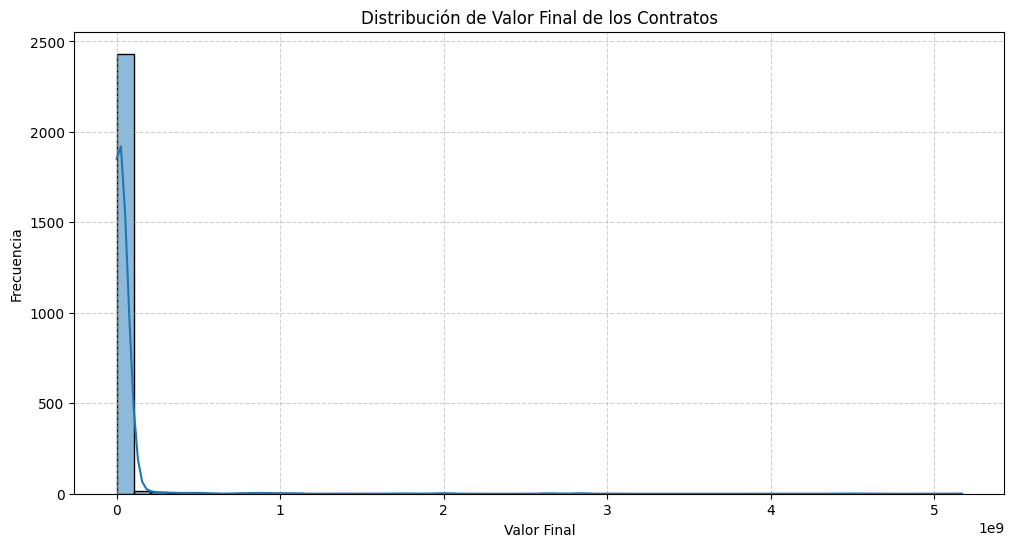

/tmp/ipython-input-3630194444.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




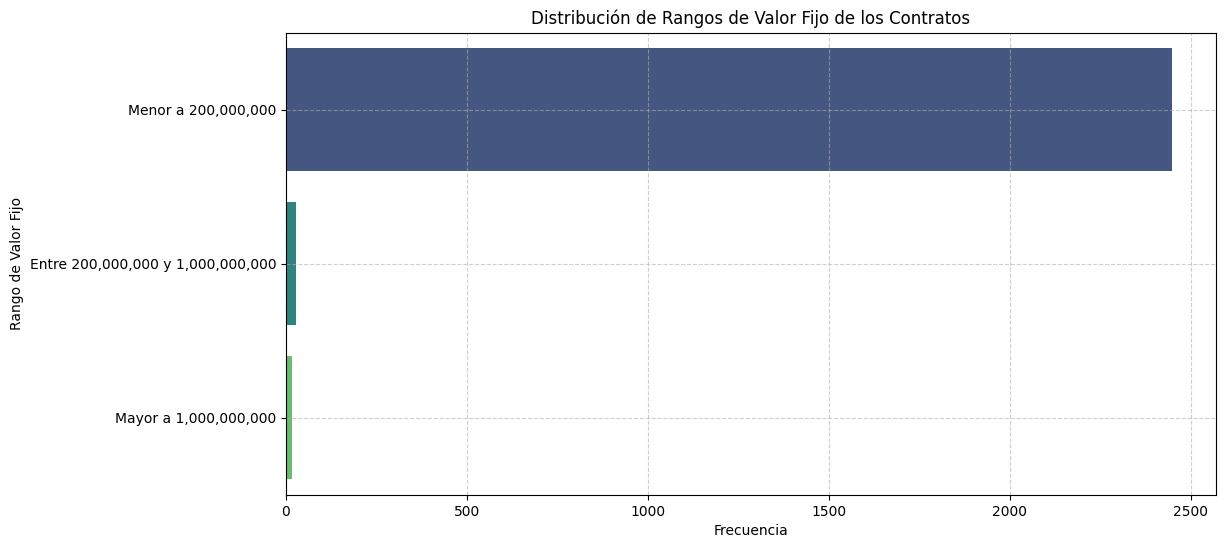

--- Histogramas generados exitosamente ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---")

# Histograma para 'valor_final'
plt.figure(figsize=(12, 6))
sns.histplot(df_contracts_loaded['valor_final'], kde=True, bins=50)
plt.title('Distribución de Valor Final de los Contratos')
plt.xlabel('Valor Final')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Histograma para 'Rango_Valor_Fijo'
plt.figure(figsize=(12, 6))
sns.countplot(y=df_contracts_loaded['Rango_Valor_Fijo'], order=df_contracts_loaded['Rango_Valor_Fijo'].value_counts().index, palette='viridis')
plt.title('Distribución de Rangos de Valor Fijo de los Contratos')
plt.xlabel('Frecuencia')
plt.ylabel('Rango de Valor Fijo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Histogramas generados exitosamente ---")

--- Visualizando outliers en 'valor_contrato' con un Boxplot ---


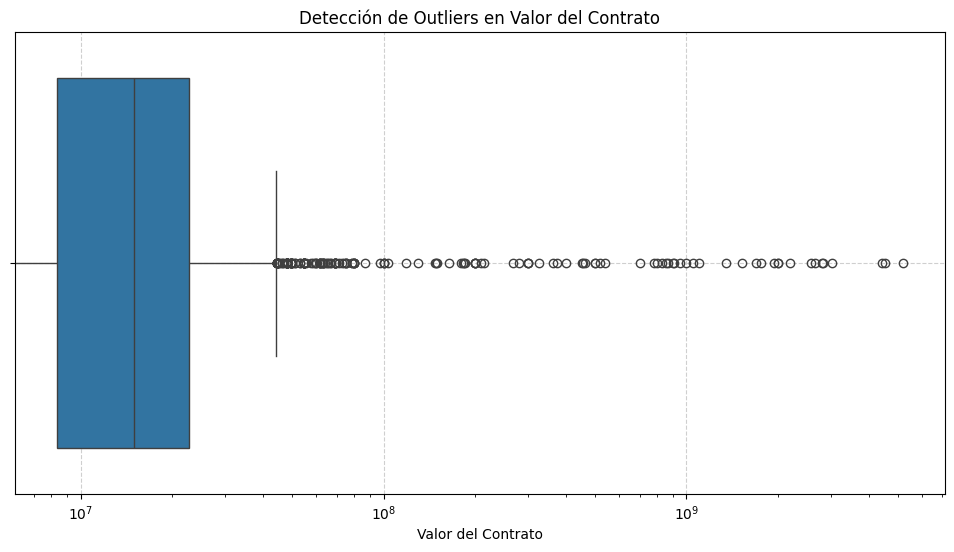

--- Listando los 10 contratos con valores más elevados ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                      |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista     | nombre_de_la_entidad                                                             |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Visualizando outliers en 'valor_contrato' con un Boxplot ---")

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_contracts['valor_contrato'])
plt.title('Detección de Outliers en Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.xscale('log') # Usar escala logarítmica si los valores son muy dispersos
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Listando los 10 contratos con valores más elevados ---")

# Ordenar el DataFrame por 'valor_contrato' de forma descendente y seleccionar los 10 primeros
top_10_high_value_contracts = df_contracts.sort_values(by='valor_contrato', ascending=False).head(10)

# Columnas a mostrar para los contratos top
display_cols_outliers = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los 10 contratos con mayor valor
print(top_10_high_value_contracts[display_cols_outliers].to_markdown(index=False))

print("--- Análisis de outliers y contratos elevados completado ---")

## Análisis y Visualización de Clusters

**Reasoning**:
First, we assign the `cluster_labels` to the original DataFrame (`df_contracts`) so we can analyze the characteristics of each cluster in subsequent steps. Then, we visualize the clusters using the first two principal components of the PCA-reduced data (`X_pca`) to observe their spatial separation.

--- Asignando etiquetas de cluster al DataFrame original ---
  ✅ Etiquetas de cluster asignadas al DataFrame 'df_contracts'.
  Conteo de elementos por cluster:
 cluster
3    1745
0     326
2     299
1     108
4      15
Name: count, dtype: int64
--- Visualizando clusters usando las primeras dos componentes principales (PCA) ---


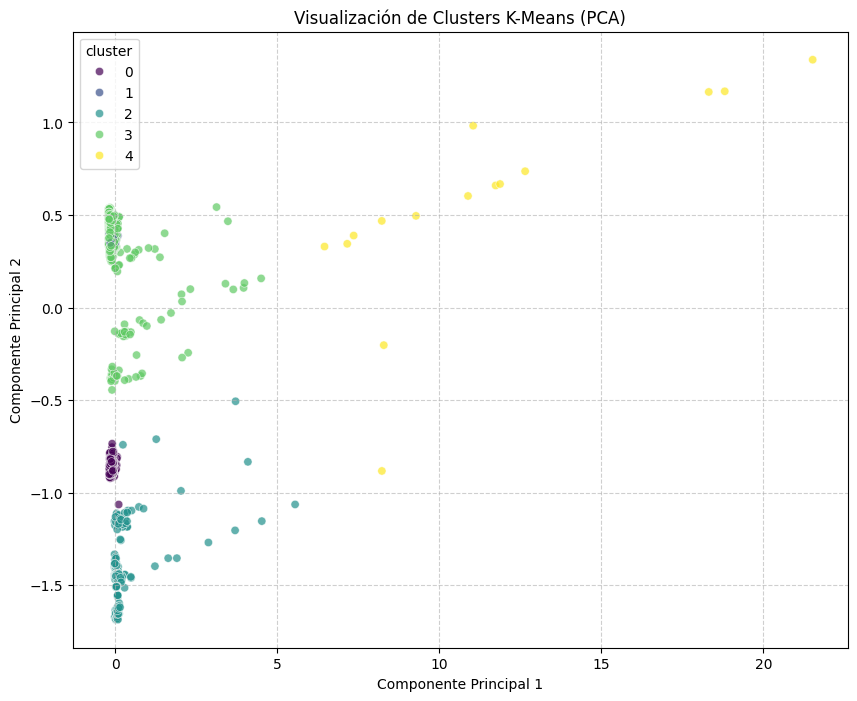

--- Visualización de clusters completada ---


In [ ]:
print("--- Asignando etiquetas de cluster al DataFrame original ---")

# Asignar las etiquetas de cluster al DataFrame original
df_contracts['cluster'] = cluster_labels

print("  ✅ Etiquetas de cluster asignadas al DataFrame 'df_contracts'.")
print("  Conteo de elementos por cluster:\n", df_contracts['cluster'].value_counts())

print("--- Visualizando clusters usando las primeras dos componentes principales (PCA) ---")

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame para la visualización con las primeras dos componentes de PCA y las etiquetas de cluster
df_pca_clusters = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca_clusters['cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster',
    data=df_pca_clusters,
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.title('Visualización de Clusters K-Means (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Visualización de clusters completada ---")